In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/100-days-of-machine-learning/day25-normalization/wine_data.csv',)

In [ ]:
df.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [ ]:
# header=None,usecols=[0,1,2]
df = pd.read_csv('/content/drive/My Drive/100-days-of-machine-learning/day25-normalization/wine_data.csv',header=None,usecols=[0,1,2])

In [ ]:
df.head()

,0,1,2
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [ ]:
df.columns=["Class label1","Alcohol","Malic acid"]

In [ ]:
df.head()

,Class label1,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


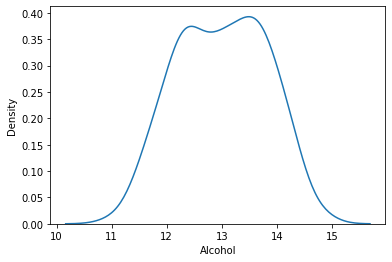

In [ ]:
# sns.distplot(df["Alcohol"],hist=False)
sns.kdeplot(df["Alcohol"])

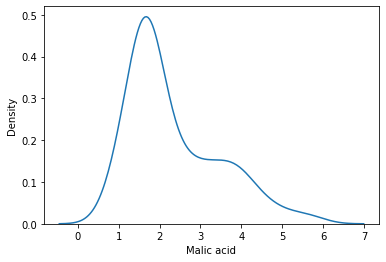

In [ ]:
sns.kdeplot(df["Malic acid"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


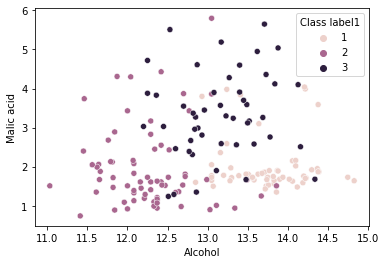

In [ ]:
sns.scatterplot(df["Alcohol"],df["Malic acid"],hue=df["Class label1"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


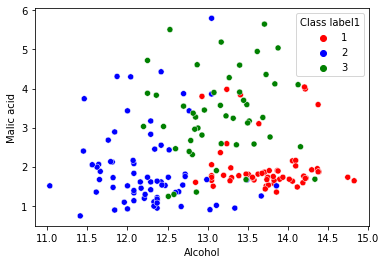

In [ ]:
color_dict={1:"red",3:"green",2:"blue"}
sns.scatterplot(df["Alcohol"],df["Malic acid"],hue=df["Class label1"],palette=color_dict)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=df.iloc[:,1:]
y=df.iloc[:,0:1]

In [ ]:
# ["Class label1","Alcohol","Malic acid"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
x_train.shape,x_test.shape

((124, 2), (54, 2))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

# fit the scaler to the Tran set, it will learn the parameters
scaler.fit(x_train)

#  transform train and test sets

x_train_scaled= scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
x_train_scaled= pd.DataFrame(x_train_scaled, columns = x_train.columns)
x_test_scaled= pd.DataFrame(x_test_scaled, columns = x_test.columns)

In [ ]:
np.round(x_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [ ]:
np.round(x_train_scaled.describe(),1)
#  After MinMaxScaling min=0 and max=1

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


In [ ]:
x_train_scaled.describe()

,Alcohol,Malic acid
count,124.000000,124.000000
mean,0.525017,0.313805
std,0.215414,0.238802
min,0.000000,0.000000
25%,0.358199,0.150735
50%,0.540323,0.209034
75%,0.701613,0.495273
max,1.000000,1.000000


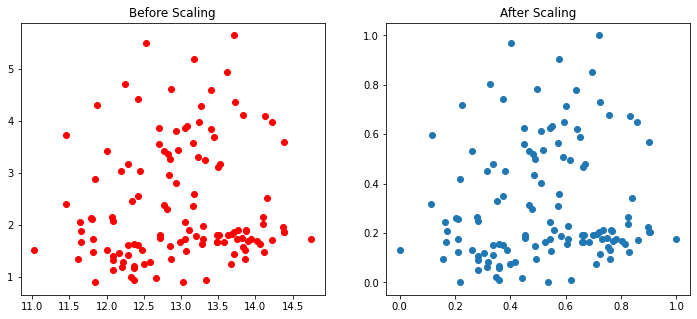

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train['Alcohol'], x_train['Malic acid'], c="red")
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['Alcohol'], x_train_scaled['Malic acid'])
ax2.set_title("After Scaling")
plt.show()

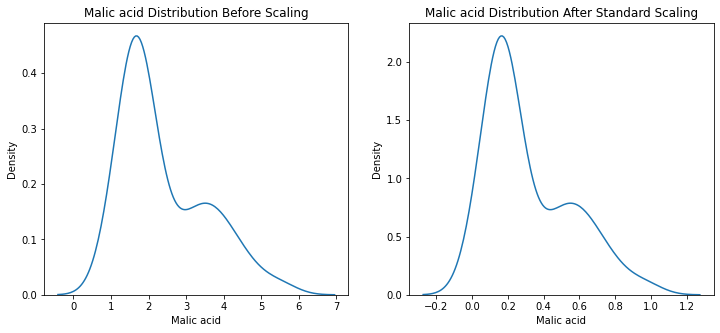

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(x_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Standard Scaling')
sns.kdeplot(x_train_scaled['Malic acid'], ax=ax2)
plt.show()